### ☕ Coffee Quality database from CQI ☕

These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers.
https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi


_______
Importando bibliotecas
_____

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

_______
Definindo funções a serem utilizadas
_____

In [46]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

_______
Importando o dataset
___

In [ ]:
df_coffee = pd.read_csv('merged_data_cleaned.csv')
df_coffee.shape

In [ ]:
df_coffee.head(3)

In [ ]:
df_coffee.columns

In [ ]:
cols = [0,2,4,5,6,7,11,37,38,39]

df_coffee.drop(df_coffee.columns[cols], axis = 1, inplace = True)

In [ ]:
df_coffee.info()

In [ ]:
df_coffee['Region'][df_coffee['Region'].isna()] = 'Desconhecida'

In [ ]:
#Dropando a linha em que o país era NaN e a linha em que as medidas de qualidade estavam nulas
df_coffee[df_coffee['Country.of.Origin'].isna()]
df_coffee.drop([1197, 1310], inplace = True)

In [ ]:
df_coffee.describe().round(3)
#Altitude maxima esta bem alta - outlier

____
Corrigindo altitudes
____

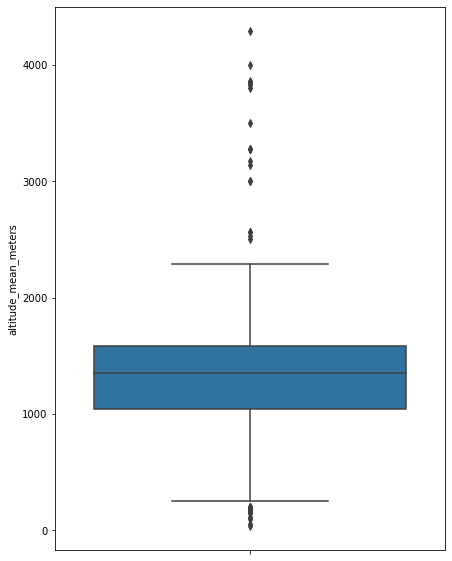

In [42]:
plt.figure(figsize=(7,10))
sns.boxplot(data=df_coffee, y=df_coffee['altitude_mean_meters']);

In [ ]:
#Identificando países que tem altitudes muito elevadas
#Chega-se à conclusão que Brasil, Guatemala e Nicaragua tem altitudes que são bem elevadas e foram inseridas errado.
df_coffee.iloc[:,[1,31,32,33]].groupby('Country.of.Origin').max().round(2)

In [43]:
display(df_coffee.loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["altitude_high_meters"] >= 2000)].iloc[:,[1,31,32,33]])
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna].loc[df_coffee[coluna] == 11000] = 1100


,Country.of.Origin,altitude_low_meters,altitude_high_meters,altitude_mean_meters


In [ ]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Nicaragua") & (df_coffee["altitude_high_meters"] >= 1000)].iloc[:,[1,31,32,33]]

for coluna in cols:
    df_coffee[coluna].loc[df_coffee[coluna] == 110000] = 1100

In [ ]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["altitude_high_meters"] >= 2000)].iloc[:,[1,31,32,33]]

In [ ]:
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna][(df_coffee[coluna] == 190164)] = df_coffee[coluna][df_coffee['Country.of.Origin'] == 'Guatemala'].mean()

In [ ]:
#Identificando países com baixas altitudes
df_coffee.iloc[:,[1,31,32,33]].groupby('Country.of.Origin').min().round(2)

In [ ]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["altitude_high_meters"] < 100)].iloc[:,[1,4,31,32,33]]

In [ ]:
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "sul de minas - carmo de minas")] =  1200
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "south of minas")] =  1000
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Brazil") & (df_coffee["Region"] == "sul de minas")] =  1250


In [ ]:
df_coffee.loc[(df_coffee["Country.of.Origin"] == "Kenya")].iloc[:,[1,4,31,32,33]]
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Kenya") & (df_coffee[coluna] < 600)] = df_coffee[coluna][df_coffee['Country.of.Origin'] == 'Kenya'].mean()

In [ ]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["Region"] == "el progreso")] =  1370
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Guatemala") & (df_coffee["Region"] == "oriente")] =  1370


In [ ]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Mexico") & (df_coffee["altitude_low_meters"] == 100)] =  1000
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Mexico") & (df_coffee["Region"] == "amatenango de la frontera")] =  1600


In [ ]:
for coluna in cols:
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Costa Rica") & (df_coffee["Region"] == "turrialba")] =  1300
    df_coffee[coluna].loc[(df_coffee["Country.of.Origin"] == "Costa Rica") & (df_coffee["altitude_low_meters"] == 185) & (df_coffee["Region"] == "tarrazu")] =  1850

____
Substituindo valores Nan nas altitudes
___

In [ ]:
df_coffee[(df_coffee['altitude_low_meters'].isna())]

In [ ]:
# Valores vazios foram substituídos pela média do país
paises = df_coffee['Country.of.Origin'].unique()
cols = ["altitude_low_meters","altitude_high_meters","altitude_mean_meters"]

for pais in paises:
        for coluna in cols:
                df_coffee[coluna][(df_coffee[coluna].isna()) & (df_coffee['Country.of.Origin'] == pais)] = df_coffee[coluna][(df_coffee['Country.of.Origin'] == pais)].mean()


_____

### Análises
___

Gráfico de dispersão para análise de correlação entre altitude e qualidade

- removendo outliers

In [47]:
df_altitude = outliers(df_coffee, 'Total.Cup.Points')

                      Total.Cup.Points  altitude_mean_meters
Total.Cup.Points              1.000000              0.162761
altitude_mean_meters          0.162761              1.000000


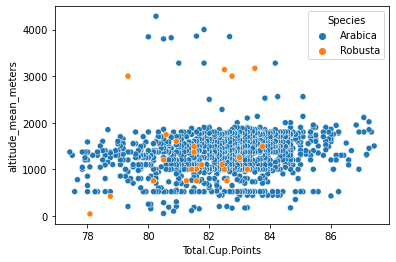

In [66]:
#plt.scatter(df_altitude['Total.Cup.Points'], df_altitude['altitude_mean_meters']);
sns.scatterplot(df_altitude['Total.Cup.Points'], df_altitude['altitude_mean_meters'], hue=df_altitude['Species']);
print(df_altitude[['Total.Cup.Points', 'altitude_mean_meters']].corr())

                  Total.Cup.Points  Sweetness
Total.Cup.Points          1.000000   0.163044
Sweetness                 0.163044   1.000000


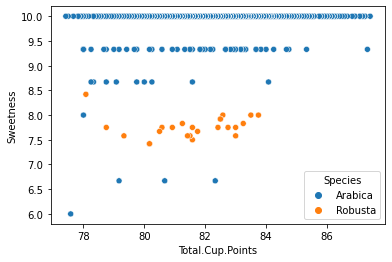

In [67]:
#plt.scatter(df_altitude['Total.Cup.Points'], df_altitude['Sweetness']);
sns.scatterplot(df_altitude['Total.Cup.Points'], df_altitude['Sweetness'], hue=df_altitude['Species']);
print(df_altitude[['Total.Cup.Points', 'Sweetness']].corr())

Gráfico heatmap para análise da correlação entre as medidas de qualidade

In [ ]:
df_measures = df_coffee[['Aroma','Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity','Clean.Cup', 'Sweetness']]
display(df_measures.head())

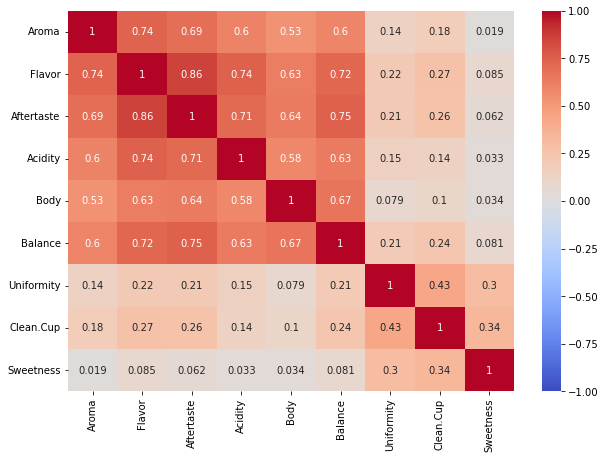

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(df_measures.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot = True);

In [ ]:
plt.figure(figsize=(10,7))
#sns.pairplot(df_measures);